#### Resources:
Paul Centore - A Zonohedral Approach to Optimal Colours
(https://legacy.sites.fas.harvard.edu/~cs278/papers/zone.pdf)

#### Instructions:
Make sure to install Jessica's repository as a Python package using the line below. It requires Python 3.11.

In [2]:
!pip install -q git+https://github.com/VarunNSrivastava/ChromaLab

In [1]:
from chromalab.observer import Observer
from chromalab.spectra import Spectra
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
%matplotlib widget

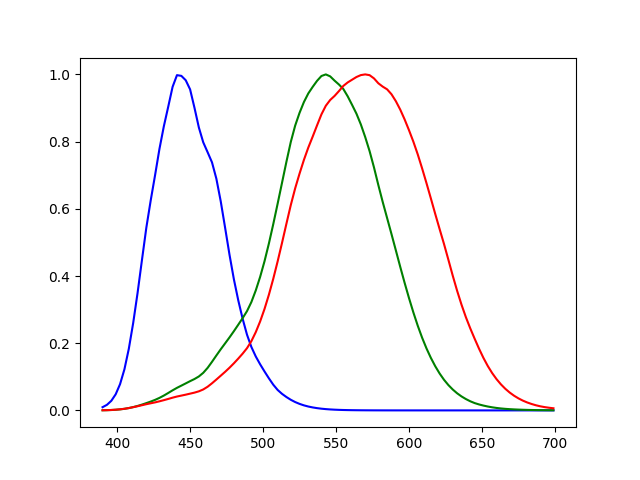

In [2]:
# Cone responses of a typical trichromat.
standard_trichromat = Observer.trichromat(np.arange(390, 701, 3))
standard_trichromat.sensors[0].plot(color="blue")
standard_trichromat.sensors[1].plot(color="green")
standard_trichromat.sensors[2].plot(color="red")

In [3]:
# Assumes an indicator reflectance function where R = 1 at a single wavelength and 0 elsewhere,
# and an illumination 1 everywhere.
# This represents equations (9), (10), (11), (12), (13).
points = np.vstack((standard_trichromat.sensors[0].data, 
                    standard_trichromat.sensors[1].data, 
                    standard_trichromat.sensors[2].data)).T
points /= np.sum(standard_trichromat.sensors[1].data)

In [4]:
n = points.shape[0]
vertices = np.zeros((n + 1, n, 3))
# This represents the matrix in (7).
for i in range(1, n + 1):
    for j in range(n):
        vertices[i, j] = vertices[i - 1, j] + points[(i + j - 1) % n]
faces = np.zeros((n * (n - 1), 4, 3))
# This represents the diagram in (8)
for i in range(1, n):
    for j in range(n):
        faces[((i - 1) * n) + j, 0] = vertices[i, j]
        faces[((i - 1) * n) + j, 1] = vertices[i - 1, (j + 1) % n]
        faces[((i - 1) * n) + j, 2] = vertices[i, (j + 1) % n]
        faces[((i - 1) * n) + j, 3] = vertices[i + 1, j]

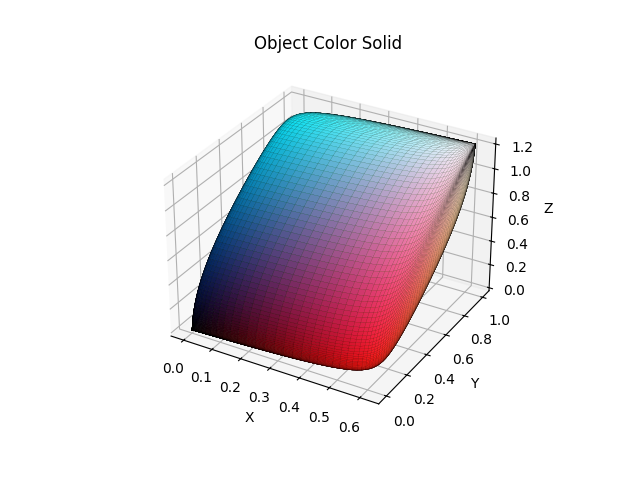

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
poly3d = Poly3DCollection(faces, linewidths=0.05, edgecolors='k')

# The color of each face is a function of the coordinates of its center.
# TODO: This isn't an accurate representation of the solid's color at a point, need to find a more accurate representation.
colors = []
max_x = np.max(faces[:, :, 0])
max_y = np.max(faces[:, :, 1])
max_z = np.max(faces[:, :, 2])
for face in faces:
    r = np.mean(face[:, 0]) / max_x
    g = np.mean(face[:, 1]) / max_y
    b = np.mean(face[:, 2]) / max_z
    colors.append([r, g, b])
poly3d.set_facecolor(colors)

ax.add_collection3d(poly3d)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Object Color Solid')
plt.show()